In [120]:
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import bokeh
%matplotlib inline

def frakiesFunc(x,y):
    x1 =x
    x2 =y
    term1 = 0.75 * np.exp(-(9*x1-2)**2/4 - (9*x2-2)**2/4)
    term2 = 0.75 * np.exp(-(9*x1+1)**2/49 - (9*x2+1)/10)
    term3 = 0.5 * np.exp(-(9*x1-7)**2/4 - (9*x2-3)**2/4)
    term4 = -0.2 * np.exp(-(9*x1-4)**2 - (9*x2-7)**2)

    y = term1 + term2 + term3 + term4;
    return y



In [126]:

x = np.arange(0, 1.1, 0.1)
y = np.arange(0, 1.1, 0.1)

xx, yy = np.meshgrid(x, y)
z = frakiesFunc(xx,yy)

1.21858070417


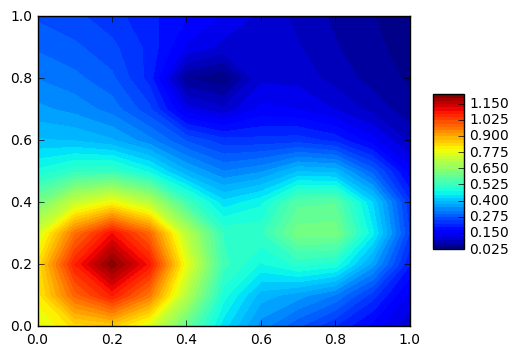

In [127]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
print(np.max(z))
ax = fig.add_subplot(111)

surf = ax.contourf(xx, yy, z,50)

#ax.set_zlim(0, 2)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


    

In [131]:
def posterior(bo, x,y, xmin=0, xmax=1):
    
    bo.gp.fit(bo.X, bo.Y)
    X = np.vstack((np.ravel(x),np.ravel(y)))
    print(np.shape(X.T))
    mu, sigma = bo.gp.predict(X.T, return_std=True)
    return mu, sigma

def plot_charts(bo, x, y, z):
    plt.figure()
    ax = plt.subplot(2,2,1)
    ax.contourf(xx, yy, z,50)
    print(np.asmatrix(bo.X[:,1]))
    ax.scatter(bo.X[:,0],bo.X[:,1],marker='*')
    
    mu, sigma = posterior(bo, x, y)

In [133]:
bo = BayesianOptimization(frakiesFunc, {'x': (0, 1),'y':(0,1)})

bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |    0.18622 |    0.5013 |    0.6452 | 
    2 | 00m00s |    0.99484 |    0.0677 |    0.1855 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 


Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    3 | 00m01s |    0.10756 |    1.0000 |    0.0000 | 
[[ 0.64515817  0.18546364  0.        ]]
(121, 2)
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    4 | 00m01s |    0.06064 |    0.3929 |    0.7891 | Warning: Test point chose at random due to repeated sample.

[[ 0.64515817  0.18546364  0.          0.78909791]]
(121, 2)


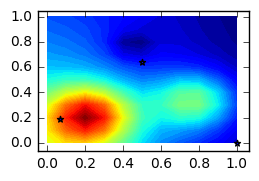

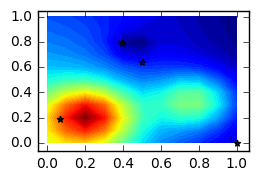

In [134]:
for i in range(0,2):
    bo.maximize(init_points=0, n_iter=1, kappa=5)
    plot_charts(bo,xx,yy,z)